<a href="https://colab.research.google.com/github/Medissaoui07/Reinforcement-Learning-with-TorchRL/blob/main/MARL(PPO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchrl
!pip install tqdm
!pip install vmas

In [ ]:
import torch
from tensordict.nn import TensorDictModule
from torchrl.data.replay_buffers import ReplayBuffer
from torchrl.envs import VmasEnv

In [ ]:
#define the hyperparams
max_steps_per_ep=100
frames_per_batch=6000
nb_iter=10
total_frames=frames_per_batch*nb_iter
mini_batch_size=32
num_epochs=30
#devices
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)
#PPO
clip=0.2
lmbda=0.9
gamma=0.99
entropy=1e-4
lr=1e-4

vmas_device = device
print(vmas_device)


cpu
cpu


In [ ]:

num_env=frames_per_batch//max_steps_per_ep
print(num_env)
scenario="navigation"
nb_agents=3

base_env=VmasEnv(
    scenario=scenario,
    num_envs=num_env,
    max_steps_per_ep=max_steps_per_ep,
    device=device,
    n_agents=nb_agents,
    continuous_actions=True
)

60


/usr/local/lib/python3.11/dist-packages/vmas/simulator/utils.py:317: UserWarning: Scenario kwargs: {'max_steps_per_ep': 100} passed but not used by the scenario. This will turn into an error in future versions.
  warnings.warn(


In [ ]:
print("action_spec:", base_env.full_action_spec)
print("reward_spec:", base_env.full_reward_spec)
print("done_spec:", base_env.full_done_spec)
print("observation_spec:", base_env.observation_spec)

action_spec: Composite(
    agents: Composite(
        action: BoundedContinuous(
            shape=torch.Size([60, 3, 2]),
            space=ContinuousBox(
                low=Tensor(shape=torch.Size([60, 3, 2]), device=cpu, dtype=torch.float32, contiguous=True),
                high=Tensor(shape=torch.Size([60, 3, 2]), device=cpu, dtype=torch.float32, contiguous=True)),
            device=cpu,
            dtype=torch.float32,
            domain=continuous),
        device=cpu,
        shape=torch.Size([60, 3])),
    device=cpu,
    shape=torch.Size([60]))
reward_spec: Composite(
    agents: Composite(
        reward: UnboundedContinuous(
            shape=torch.Size([60, 3, 1]),
            space=ContinuousBox(
                low=Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, contiguous=True),
                high=Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, contiguous=True)),
            device=cpu,
            dtype=torch.float32,
  

In [ ]:
from torchrl.envs import TransformedEnv , RewardSum


env=TransformedEnv(
    env=base_env,
    transform=RewardSum(in_keys=[base_env.reward_key] ,
    out_keys=[("agents", "episode_reward")]),)



In [ ]:
from torchrl.envs.utils import check_env_specs
check_env_specs(env)



2025-01-29 16:58:20,199 [torchrl][INFO] check_env_specs succeeded!


In [ ]:
rollout=env.rollout(5)
print("rollout of three steps:", rollout)
print("Shape of the rollout TensorDict:", rollout.batch_size)

rollout of three steps: TensorDict(
    fields={
        agents: TensorDict(
            fields={
                action: Tensor(shape=torch.Size([60, 5, 3, 2]), device=cpu, dtype=torch.float32, is_shared=False),
                episode_reward: Tensor(shape=torch.Size([60, 5, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                info: TensorDict(
                    fields={
                        agent_collisions: Tensor(shape=torch.Size([60, 5, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                        final_rew: Tensor(shape=torch.Size([60, 5, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                        pos_rew: Tensor(shape=torch.Size([60, 5, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False)},
                    batch_size=torch.Size([60, 5, 3]),
                    device=cpu,
                    is_shared=False),
                observation: Tensor(shape=torch.Size([60, 5, 3, 18]), device=cpu, dtype=torc

In [ ]:
!apt-get update
!apt-get install -y x11-utils
!apt-get install -y xvfb
!pip install pyvirtualdisplay

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:

!apt-get install -y libglu1-mesa-dev freeglut3-dev mesa-common-dev
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libglu1-mesa-dev is already the newest version (9.0.2-1).
freeglut3-dev is already the newest version (2.8.1-6).
mesa-common-dev is already the newest version (23.2.1-1ubuntu3.1~22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


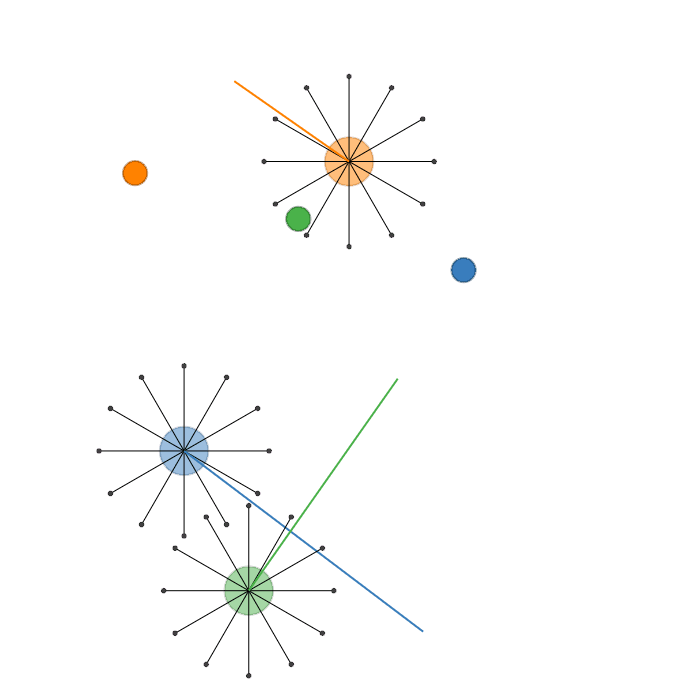

In [ ]:
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
display.start()
from PIL import Image

def rendering_callback(env, td):
    env.frames.append(Image.fromarray(env.render(mode="rgb_array")))
env.frames = []
with torch.no_grad():
   env.rollout(
       max_steps=max_steps_per_ep,
       callback=rendering_callback,
       auto_cast_to_device=True,
       break_when_any_done=False,
   )
env.frames[0].save(
    f"{scenario}.gif",
    save_all=True,
    append_images=env.frames[1:],
   duration=3,
   loop=0,
)

from IPython.display import Image
Image(open(f"{scenario}.gif", "rb").read())

In [ ]:
from torch.nn import functional as F
import torch.nn as nn
from torchrl.modules import MultiAgentMLP
from tensordict.nn.distributions import NormalParamExtractor

policy_network=nn.Sequential(
    MultiAgentMLP(
        n_agent_inputs=env.observation_spec["agents" , "observation"].shape[-1],
        n_agent_outputs=2*env.action_spec.shape[-1],
        n_agents=env.n_agents,
        centralized=False ,
        share_params=True ,
        device=device ,
        depth=4,
        num_cells=256,
        activation_class=torch.nn.Tanh,

    ),
    NormalParamExtractor(),
)



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
policy_module = TensorDictModule(
    policy_network,
    in_keys=[("agents", "observation")],
    out_keys=[("agents", "loc"), ("agents", "scale")],
)

In [ ]:
from torchrl.modules import ProbabilisticActor , TanhNormal


policy = ProbabilisticActor(
    module=policy_module,
    spec=env.unbatched_action_spec,
    in_keys=[("agents", "loc"), ("agents", "scale")],
    out_keys=[env.action_key],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "low": env.unbatched_action_spec[env.action_key].space.low,
        "high": env.unbatched_action_spec[env.action_key].space.high,
    },
    return_log_prob=True,
    log_prob_key=("agents", "sample_log_prob"),
)  #

In [ ]:
share_parameters_critic = True
mappo = True  # IPPO if False

critic_net = MultiAgentMLP(
    n_agent_inputs=env.observation_spec["agents", "observation"].shape[-1],
    n_agent_outputs=1,
    n_agents=env.n_agents,
    centralised=mappo,
    share_params=share_parameters_critic,
    device=device,
    depth=2,
    num_cells=256,
    activation_class=torch.nn.Tanh,
)

critic = TensorDictModule(
    module=critic_net,
    in_keys=[("agents", "observation")],
    out_keys=[("agents", "state_value")],
)

In [ ]:
print("Running policy:", policy(env.reset()))
print("Running value:", critic(env.reset()))

Running policy: TensorDict(
    fields={
        agents: TensorDict(
            fields={
                action: Tensor(shape=torch.Size([60, 3, 2]), device=cpu, dtype=torch.float32, is_shared=False),
                episode_reward: Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                info: TensorDict(
                    fields={
                        agent_collisions: Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                        final_rew: Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                        pos_rew: Tensor(shape=torch.Size([60, 3, 1]), device=cpu, dtype=torch.float32, is_shared=False)},
                    batch_size=torch.Size([60, 3]),
                    device=cpu,
                    is_shared=False),
                loc: Tensor(shape=torch.Size([60, 3, 2]), device=cpu, dtype=torch.float32, is_shared=False),
         

In [ ]:
from torchrl.collectors import SyncDataCollector
from torchrl.data.replay_buffers import ReplayBuffer
from torchrl.data.replay_buffers.samplers import SamplerWithoutReplacement
from torchrl.data.replay_buffers.storages import LazyTensorStorage

In [ ]:
data_collector = SyncDataCollector(
    env,
    policy=policy,
    device=vmas_device ,
    storing_device=device,
    total_frames=total_frames,
    frames_per_batch=frames_per_batch,
)

In [ ]:
replay_buffer=ReplayBuffer(
    storage=LazyTensorStorage(max_size=100000),
    sampler=SamplerWithoutReplacement(),

    batch_size=mini_batch_size,
)


In [ ]:
from torchrl.objectives import ClipPPOLoss, ValueEstimators

loss_module = ClipPPOLoss(
      actor_network=policy,
      critic_network=critic,
      clip_epsilon=clip,
      normalize_advantage=False,
      )


loss_module.set_keys(
    reward=env.reward_key,
    action=env.action_key,
    sample_log_prob=("agents", "sample_log_prob"),
    value=("agents", "state_value"),
    done=("agents", "done"),
    terminated=("agents", "terminated")

)
loss_module.make_value_estimator(
    ValueEstimators.GAE , gamma=gamma, lmbda=lmbda )
GAE=loss_module.value_estimator



In [ ]:
optimizer = torch.optim.Adam(loss_module.parameters(), lr=lr)

In [ ]:
from tqdm import tqdm
import torch

# Progress bar
prog_bar = tqdm(total=nb_iter)
mean_reward_ep_lt = []

for data in data_collector:
  data.set(("next", "agents", "done"),
             data.get(("next", "done")).unsqueeze(-1)
             .expand(data.get_item_shape(("next", env.reward_key))),
             )

  data.set(("next", "agents", "terminated"),
              data.get(("next", "terminated")).unsqueeze(-1)
              .expand(data.get_item_shape(("next", env.reward_key))),
              )

  with torch.no_grad():
        GAE(
            data,
            params=loss_module.critic_network_params,
            target_params=loss_module.target_critic_network_params,  # Check if target parameters are different
        )

    # Fix: Corrected get_item_shape method and keys

  replay_buffer.extend(data)

  for _ in range(num_epochs):
        for _ in range(frames_per_batch // mini_batch_size):
            sample = replay_buffer.sample()
            loss_vals = loss_module(sample)
            loss_val = (loss_vals["loss_objective"] +
                        loss_vals["loss_entropy"] +
                        loss_vals["loss_critic"])
            loss_val.backward()
            optimizer.step()
            optimizer.zero_grad()

    # Logging
  done = data.get(("next", "agents", "done")).bool()  # Ensure it's boolean
  if "episode_reward" in data.keys():
        episode_rewards = data.get(("next", "agents", "episode_reward"))
        if done.shape == episode_rewards.shape:
            episode_reward_mean = episode_rewards.masked_select(done).mean().item()
        else:
            episode_reward_mean = episode_rewards.mean().item()  # Fallback
  else:
        episode_reward_mean = 0  # Default if missing

  mean_reward_ep_lt.append(episode_reward_mean)
  prog_bar.set_description(f"episode_reward_mean = {episode_reward_mean:.3f}", refresh=False)
  prog_bar.update()


episode_reward_mean = 0.000:  30%|███       | 3/10 [1:27:55<3:23:42, 1746.13s/it]

In [ ]:
plt.plot(episode_reward_mean_list)
plt.xlabel("Training iterations")
plt.ylabel("Reward")
plt.title("Episode reward mean")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
display.start()
from PIL import Image

def rendering_callback(env, td):
    env.frames.append(Image.fromarray(env.render(mode="rgb_array")))
env.frames = []
with torch.no_grad():
   env.rollout(
       max_steps=max_steps,
       policy=policy,
       callback=rendering_callback,
       auto_cast_to_device=True,
       break_when_any_done=False,
   )
env.frames[0].save(
    f"{scenario_name}.gif",
    save_all=True,
    append_images=env.frames[1:],
   duration=3,
   loop=0,
)

from IPython.display import Image
Image(open(f"{scenario_name}.gif", "rb").read())